In [1]:
#Определяю вспомогательные функции
import numpy as np
import matplotlib.pyplot as plt

# Решаем задачу Коши:  
# du/dx = f(x,u(x)) ,  x_0 < x <x_N , u(x_0) = y_0

F = lambda x: np.sin(x)
f = lambda x,y=0,k=3: np.cos(x) + k*(y-F(x))
N=1000
x_0 = 0
x_N = np.pi

def Plot(x,y,title = '',x_lable = 'x',y_lable = 'y'):
    plt.figure()
    plt.plot(x,F(x),color='r')
    plt.plot(x,y,color='b')
    plt.title(title)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.rcParams['figure.figsize'] = (7.0, 5.0)
    #plt.savefig(r'C:\Users\Admin\Desktop\testfig.pdf')
    plt.show()
    
def Emax(fi,y): 
    return abs(fi-y).max()   

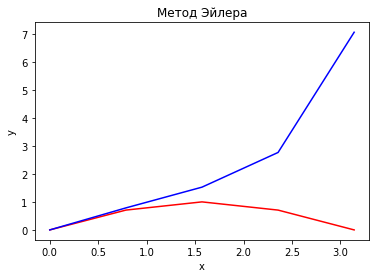

In [2]:
#Метод Эйлера
def Euler(f,x_0, x_N, N, y_0=0):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    y = np.zeros(N)
    y[0] = y_0
    for i in range(1,N):
        y[i] = y[i-1] + f(x[i-1],y[i-1])*h
    return y

N = 5
x = np.linspace(x_0,x_N,N)

y=Euler(f,x_0,x_N,N, F(x_0))
Plot(x,y,title='Метод Эйлера',x_lable = 'x',y_lable = 'y')

0.000753078302942


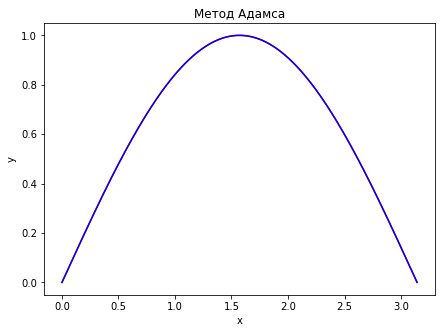

In [3]:
#Метод Адамса
def Adams(f,x_0,x_N,N,y_0):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    y = np.zeros(N)
    y[0] = y_0
    for i in range(1,4):
        y[i] = y[i-1] + f(x[i-1],y[i-1])*h  # Метод Эйлера
        
    for i in range(4,N):
        y[i] = y[i-1] + h/24*( 55*f(x[i-1],y[i-1]) - 59*f(x[i-2],y[i-2]) + 37*f(x[i-3],y[i-3]) - 9*f(x[i-4],y[i-4]) )
    return y

#Метод Адамса с заданием начальных точек из метода Рунге-Кутты 4-го порядка
def AdamsR(f,x_0,x_N,N,y_0):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    y = np.zeros(N)
    y[0] = y_0
    for i in range(1,4):
        k1 = h*f(x[i-1] , y[i-1])
        k2 = h*f(x[i-1] + h*0.5 , y[i-1] + k1*0.5)
        k3 = h*f(x[i-1] + h*0.5 , y[i-1] + k2*0.5)
        k4 = h*f(x[i-1] + h , y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
        
    for i in range(4,N):
        y[i] = y[i-1] + h/24*( 55*f(x[i-1],y[i-1]) - 59*f(x[i-2],y[i-2]) + 37*f(x[i-3],y[i-3]) - 9*f(x[i-4],y[i-4]) )
    return y

N = 1000
x = np.linspace(x_0,x_N,N)

y=Adams(f,x_0,x_N,N,F(x_0))
print(Emax(F(x),y))
Plot(x,y,title='Метод Адамса',x_lable = 'x',y_lable = 'y')

In [10]:
#Метод предиктор-корректор с заданием начальных точек из метода Эйлера 
Smax=100
def PC1E(f,x_0,x_N,N,y_0=0,eps=1e-5):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    y_curr = np.zeros(N)
    y_curr[0] = y_0
    s=0
    for i in range(1,N):
        k=0
        y_prev = y_curr[i-1] +h*f(x[i-1],y_curr[i-1]) # у_i^(0)
        
        y_curr[i] = y_curr[i-1] + h*( f(x[i-1],y_curr[i-1]) + f(x[i],y_prev) )/2    # y_i(s-1) -> y_i(s)
        
        while abs( (y_curr[i]-y_prev)/y_prev ) > eps and k < Smax:
            y_prev = y_curr[i]
            y_curr[i] = y_curr[i-1] + h*( f(x[i-1],y_curr[i-1]) + f(x[i],y_prev) )/2 # y_i(s-1) -> y_i(s)
            
            k+=1
        s+=k    
    #print("s_среднее=", s/N)
    return y_curr

In [91]:
# Подбираем eps для ПК
#Вывожу таблицу [s(N,eps),Emax(N,eps)] в файл

n=10
Nmax = 100001

file = open(r'C:\Users\Admin\Desktop\S_Emax(N,eps).txt','w')
file.write(' ')
file.close()
file = open(r'C:\Users\Admin\Desktop\S_Emax(N,eps).txt','ba')

while(n<Nmax):
    eps=1e-10
    file = open(r'C:\Users\Admin\Desktop\S_Emax(N,eps).txt','a')
    file.write('\n')
    file.close()
    file = open(r'C:\Users\Admin\Desktop\S_Emax(N,eps).txt','ba')
    x=np.linspace(x_0,x_N,n)
    fi=F(x)
    np.savetxt(file,[n],newline = '  ',fmt='%d')
    file.close()
    print('n=',n)
    
    while eps<=1e-2:
        file = open(r'C:\Users\Admin\Desktop\S_Emax(N,eps).txt','ba')
        np.savetxt(file, [Emax(fi,PC1E(f,x_0,x_N,n,F(x_0),eps))] ,newline = '  ',fmt='%1.15e')
        file.close() 
        eps*=10
    n*=10
    print('\n')
    file = open(r'C:\Users\Admin\Desktop\S_Emax(N,eps).txt','a')
    file.write('\n')
    file.close()


n= 10
s_среднее= 29.7
s_среднее= 26.6
s_среднее= 23.3
s_среднее= 20.2
s_среднее= 17.0
s_среднее= 13.9
s_среднее= 10.6
s_среднее= 7.7
s_среднее= 3.8


n= 100
s_среднее= 5.95
s_среднее= 5.05
s_среднее= 4.1
s_среднее= 3.19
s_среднее= 2.95
s_среднее= 2.07
s_среднее= 1.12
s_среднее= 0.13
s_среднее= 0.0


n= 1000
s_среднее= 2.993
s_среднее= 2.001
s_среднее= 1.999
s_среднее= 1.003
s_среднее= 1.0
s_среднее= 0.005
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0


n= 10000
s_среднее= 1.0
s_среднее= 0.9999
s_среднее= 0.9999
s_среднее= 0.0001
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0


n= 100000
s_среднее= 0.99999
s_среднее= 1e-05
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0
s_среднее= 0.0




s_среднее= 0.0


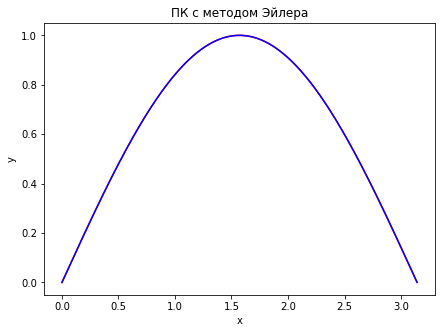

In [111]:
N = 2560
x = np.linspace(x_0,x_N,N)
Plot(x,PC1E(f,x_0,x_N,N,F(x_0)),"ПК с методом Эйлера",x_lable = 'x',y_lable = 'y')


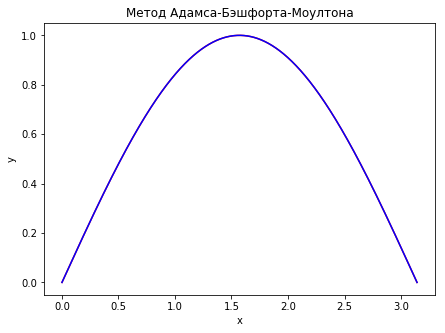

In [5]:
#Метод Адамса-Бэшфорта-Моултона
def AdBeshMoul(f,x_0,x_N,N,y_0=0):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    y_curr = np.zeros(N)
    y_curr[0] = y_0
    for i in range(1,4):
        y_curr[i] = y_curr[i-1] + f(x[i-1],y_curr[i-1])*h  # Метод Эйлера
        
    for i in range(4,N):
        y_prev = y_curr[i-1] + h*( 55*f(x[i-1],y_curr[i-1]) - 59*f(x[i-2],y_curr[i-2]) + 37*f(x[i-3],y_curr[i-3]) - 9*f(x[i-4],y_curr[i-4]) )/24
        
        y_curr[i] = y_curr[i-1] + h*( 9*f(x[i],y_prev) + 19*f(x[i-1],y_curr[i-1]) - 5*f(x[i-2],y_curr[i-2]) + f(x[i-3],y_curr[i-3]) )/24
    return y_curr

N = 10000
x = np.linspace(x_0,x_N,N)

y = AdBeshMoul(f,x_0,x_N,N,F(x_0))
Plot(x,y,title='Метод Адамса-Бэшфорта-Моултона',x_lable = 'x',y_lable = 'y') 

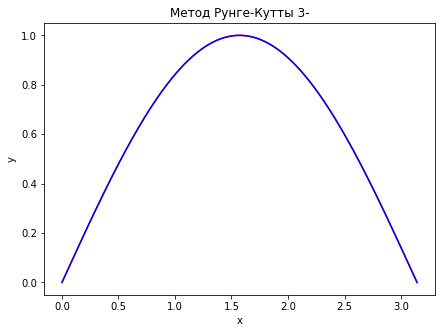

In [6]:
#Метод Рунге-Кутты 3-го порядка
def RungeKutta3(f,x_0,x_N,N,y_0=0):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    y = np.zeros(N)
    y[0]=y_0
    for i in range(1,N):
        k1 = h*f(x[i-1] , y[i-1])
        k2 = h*f(x[i-1] + h*0.5 , y[i-1] + k1*0.5)
        k3 = h*f(x[i-1] + h , y[i-1] - k1 + 2*k2)
        y[i] = y[i-1] + (k1 + 4*k2 + k3)/6
    return y


#N = 10000
x = np.linspace(x_0,x_N,N)

y = RungeKutta3(f,x_0,x_N,N,F(x_0))
Plot(x,y,title='Метод Рунге-Кутты 3-',x_lable = 'x',y_lable = 'y')  

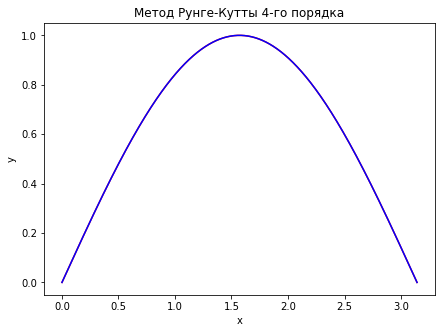

In [7]:
#Метод Рунге-Кутты 4-го порядка
def RungeKutta4(f,x_0,x_N,N,y_0=0):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    y = np.zeros(N)
    y[0]=y_0
    for i in range(1,N):
        k1 = h*f(x[i-1] , y[i-1])
        k2 = h*f(x[i-1] + h*0.5 , y[i-1] + k1*0.5)
        k3 = h*f(x[i-1] + h*0.5 , y[i-1] + k2*0.5)
        k4 = h*f(x[i-1] + h , y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    return y   
 
N = 1000
x = np.linspace(x_0,x_N,N)
y=RungeKutta4(f,x_0,x_N,N,F(x_0))

Plot(x,y,title='Метод Рунге-Кутты 4-го порядка',x_lable = 'x',y_lable = 'y') 

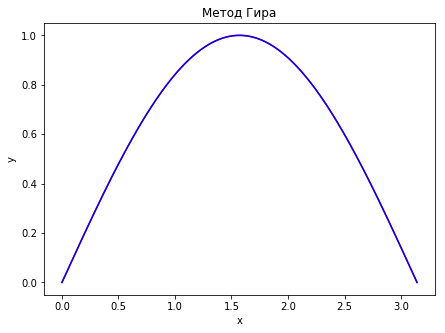

In [8]:
#Метод Гира
def Dichotomy(f,x_0,x_N,eps=1e-3): #Метод дихотомии
    i=0
    maxiter = 100000
    l=x_0
    r=x_N
    m=(r+l)*0.5
    while r-l>eps and i<maxiter:
        if f(m)*f(l)<0:
            r=m
        else:
            l=m
        m=(r+l)*0.5
        i+=1
    return m

def Secant(f,x_0,x_1,eps=1e-3): #Метод хорд
    x_prev = x_1
    x_curr = x_0
    i=0
    maxiter = 100000
    
    while True:
        x_prev , x_curr = x_curr , x_prev - f(x_prev)/(f(x_prev) - f(x_0))*(x_prev - x_0)
        
        if abs(x_curr - x_prev) > eps and i < maxiter:
            break
    return x_curr
    
def Gear(f,x_0,x_N,N,y_0=0):
    x = np.linspace(x_0,x_N,N)
    h = x[1] - x[0]
    eps = 1e-6
    y = np.zeros(N)
    y[0]=y_0
    for i in range(1,4):
        k1 = h*f(x[i-1] , y[i-1])
        k2 = h*f(x[i-1] + h/2 , y[i-1] + k1/2)
        k3 = h*f(x[i-1] + h/2 , y[i-1] + k2/2)
        k4 = h*f(x[i-1] + h , y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    for i in range(4,N):
        y[i] = Secant(lambda z: 25*z - 12*h*f(x[i],z) - 48*y[i-1] + 36*y[i-2] - 16*y[i-3] + 3*y[i-4] ,
                        y[i-1]-1/2,y[i-1]+1/2,eps)
    return y
#N = 10000
x = np.linspace(x_0,x_N,N)

y = Gear(f,x_0,x_N,N,F(x_0))
Plot(x,y,title='Метод Гира',x_lable = 'x',y_lable = 'y') 

In [42]:
# Тестирую затраты по времени
from time import time
N= 10240
t1=time()
y=Gear(f,x_0,x_N,N,F(x_0))
t2 = time()
z=Adams(f,x_0,x_N,N,F(x_0))
t3=time()
print(t2-t1,t3 - t2)

0.8906052112579346 0.7218611240386963


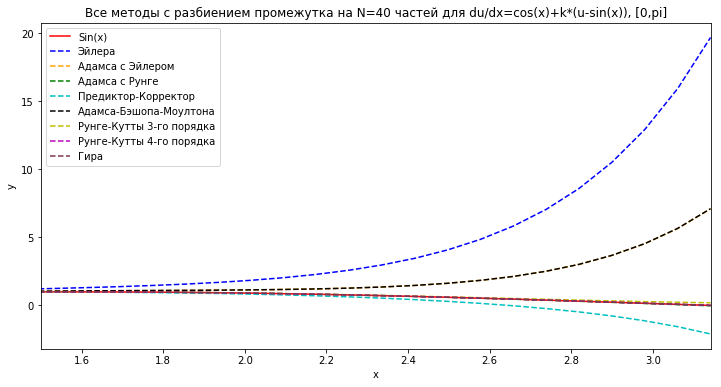

In [22]:
    #Рисую график решений для всех методов при N = 40
    n=40
    xn=np.linspace(x_0,x_N,n)
    x=np.linspace(x_0,x_N,1000)
    plt.figure()
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.xlim(1.5,np.pi)
    plt.plot(x,F(x),color='r',label = "Sin(x)")
    plt.plot(xn,Euler(f,x_0,x_N,n,F(x_0)),'b--',label = "Эйлера")
    plt.plot(xn,Adams(f,x_0,x_N,n,F(x_0)),color = 'orange',linestyle='--',label = "Адамса с Эйлером")
    plt.plot(xn,AdamsR(f,x_0,x_N,n,F(x_0)),'g--',label = "Адамса с Рунге")
    plt.plot(xn,PC1E(f,x_0,x_N,n,F(x_0)),'c--',label = "Предиктор-Корректор")
    plt.plot(xn,AdBeshMoul(f,x_0,x_N,n,F(x_0)),'k--',label = "Адамса-Бэшопа-Моултона")
    plt.plot(xn,RungeKutta3(f,x_0,x_N,n,F(x_0)),'y--',label = "Рунге-Кутты 3-го порядка")
    plt.plot(xn,RungeKutta4(f,x_0,x_N,n,F(x_0)),'m--',label = "Рунге-Кутты 4-го порядка")
    plt.plot(xn,Gear(f,x_0,x_N,n,F(x_0)),color = (0.5, 0.2, 0.3),linestyle='--',label = "Гира")
    plt.title('Все методы с разбиением промежутка на N=40 частей для du/dx=cos(x)+k*(u-sin(x)), [0,pi]')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(r'C:\Users\Admin\Desktop\allMethodsGraphN5.pdf')
    plt.show()

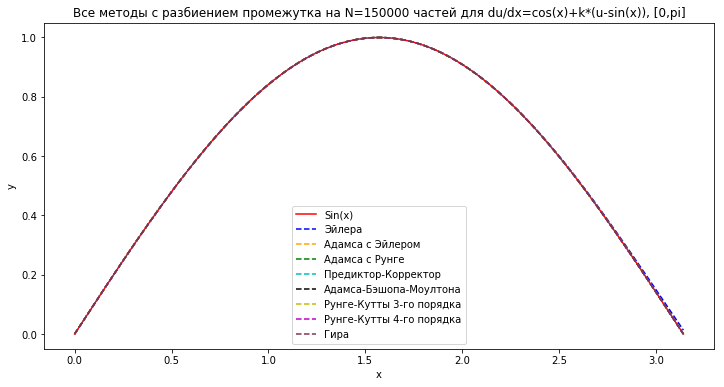

In [21]:
    #Рисую график решений для всех методов при N = 150 000
    n=150000
    xn=np.linspace(x_0,x_N,n)
    x=np.linspace(x_0,x_N,1000)
    plt.figure()
    plt.rcParams['figure.figsize'] = (12.0, 6.0)
    plt.plot(x,F(x),color='r',label = "Sin(x)")
    plt.plot(xn,Euler(f,x_0,x_N,n,F(x_0)),'b--',label = "Эйлера")
    plt.plot(xn,Adams(f,x_0,x_N,n,F(x_0)),color = 'orange',linestyle='--',label = "Адамса с Эйлером")
    plt.plot(xn,AdamsR(f,x_0,x_N,n,F(x_0)),'g--',label = "Адамса с Рунге")
    plt.plot(xn,PC1E(f,x_0,x_N,n,F(x_0)),'c--',label = "Предиктор-Корректор")
    plt.plot(xn,AdBeshMoul(f,x_0,x_N,n,F(x_0)),'k--',label = "Адамса-Бэшопа-Моултона")
    plt.plot(xn,RungeKutta3(f,x_0,x_N,n,F(x_0)),'y--',label = "Рунге-Кутты 3-го порядка")
    plt.plot(xn,RungeKutta4(f,x_0,x_N,n,F(x_0)),'m--',label = "Рунге-Кутты 4-го порядка")
    plt.plot(xn,Gear(f,x_0,x_N,n,F(x_0)),color = (0.5, 0.2, 0.3),linestyle='--',label = "Гира")
    
    plt.title('Все методы с разбиением промежутка на N=150000 частей для du/dx=cos(x)+k*(u-sin(x)), [0,pi]')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(r'C:\Users\Admin\Desktop\allMethodsGraphN10000.pdf')
    plt.show()

In [23]:
#Вывожу таблицу Emax(N) и p(N) в файл
n=5
Nmax = 1500000

file = open(r'C:\Users\Admin\Desktop\Emax(N).txt','bw')
x=np.linspace(x_0,x_N,n)
fi=F(x)
Em_prev = np.array([Emax(fi,Euler(f,x_0,x_N,n,F(x_0))),Emax(fi,Adams(f,x_0,x_N,n,F(x_0))), 
                         Emax(fi,AdamsR(f,x_0,x_N,n,F(x_0))),Emax(fi,PC1E(f,x_0,x_N,n,F(x_0))),
                    Emax(fi,AdBeshMoul(f,x_0,x_N,n,F(x_0))),Emax(fi,RungeKutta3(f,x_0,x_N,n,F(x_0))),
                    Emax(fi,RungeKutta4(f,x_0,x_N,n,F(x_0))),Emax(fi,Gear(f,x_0,x_N,n,F(x_0)))])
np.savetxt(file,[n],newline = '  ',fmt='%d')
np.savetxt(file, Em_prev,newline = '  ',fmt='%1.15e')
file.close()
file = open(r'C:\Users\Admin\Desktop\Emax(N).txt','a')
file.write('\n')
file.close()
n*=2
gile = open(r'C:\Users\Admin\Desktop\p(N).txt','w')
gile.close()

while(n<Nmax):
    with open(r'C:\Users\Admin\Desktop\Emax(N).txt','ba') as file:
        with open(r'C:\Users\Admin\Desktop\p(N).txt','ba') as gile:
            x=np.linspace(x_0,x_N,n)
            fi=F(x)
            Em_curr = np.array([Emax(fi,Euler(f,x_0,x_N,n,F(x_0))),Emax(fi,Adams(f,x_0,x_N,n,F(x_0))), 
                         Emax(fi,AdamsR(f,x_0,x_N,n,F(x_0))),Emax(fi,PC1E(f,x_0,x_N,n,F(x_0))),
                    Emax(fi,AdBeshMoul(f,x_0,x_N,n,F(x_0))),Emax(fi,RungeKutta3(f,x_0,x_N,n,F(x_0))),
                    Emax(fi,RungeKutta4(f,x_0,x_N,n,F(x_0))),Emax(fi,Gear(f,x_0,x_N,n,F(x_0)))])
        
            np.savetxt(file,[n],newline = '  ',fmt='%d')
            np.savetxt(file, Em_curr,newline = '  ',fmt='%1.15e')
        
            np.savetxt(gile,[n],newline = '  ',fmt='%d')
            np.savetxt(gile,[np.log2(abs(Em_prev/Em_curr))],newline = '  ',fmt='%f')
            file.close()
            gile.close()
    Em_prev=Em_curr
    n*=2
    
    file = open(r'C:\Users\Admin\Desktop\Emax(N).txt','a')
    file.write('\n')
    file.close()
    gile = open(r'C:\Users\Admin\Desktop\p(N).txt','a')
    gile.write('\n')
    gile.close()

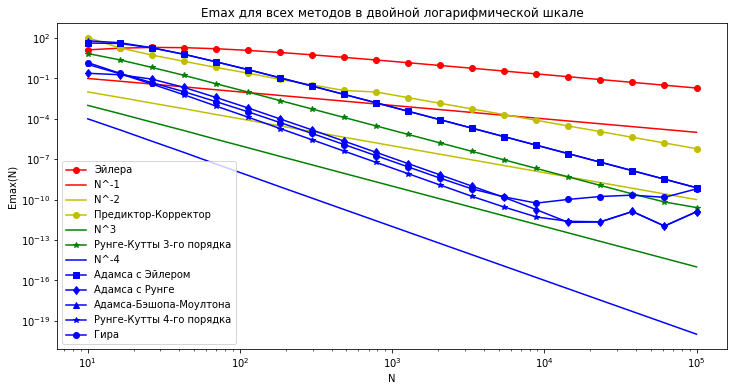

In [29]:
# Рисую график Emax(N) для всех методов в двойной логарифмической шкале
x=np.logspace(1,5,20)
plt.figure()
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.yscale('log')
plt.xscale('log')
plt.title('Emax для всех методов в двойной логарифмической шкале')
plt.xlabel('N')
plt.ylabel('Emax(N)')

plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),Euler(f,x_0,x_N,int(i),F(x_0))) for i in x],'ro-',label = "Эйлера")
plt.plot(x,[1/int(i) for i in x],'r',label = "N^-1")

plt.plot(x,[1/int(i)**2 for i in x],'y',label = "N^-2")
plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),PC1E(f,x_0,x_N,int(i),F(x_0))) for i in x],'yo-',label = "Предиктор-Корректор")

plt.plot(x,[1/int(i)**3 for i in x],'g',label = "N^3")
plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),RungeKutta3(f,x_0,x_N,int(i),F(x_0))) for i in x],'g*-',label = "Рунге-Кутты 3-го порядка")

plt.plot(x,[1/int(i)**4 for i in x],'b',label = "N^-4")
plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),Adams(f,x_0,x_N,int(i),F(x_0))) for i in x],'bs-',label = "Адамса с Эйлером")
plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),AdamsR(f,x_0,x_N,int(i),F(x_0))) for i in x],'bd-',label = "Адамса с Рунге")
plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),AdBeshMoul(f,x_0,x_N,int(i),F(x_0))) for i in x],'b^-',label = "Адамса-Бэшопа-Моултона")
plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),RungeKutta4(f,x_0,x_N,int(i),F(x_0))) for i in x],'b*-',label = "Рунге-Кутты 4-го порядка")
plt.plot(x,[Emax(F(np.linspace(x_0,x_N,int(i))),Gear(f,x_0,x_N,int(i),F(x_0))) for i in x],'bo-',label = "Гира")

plt.legend()
plt.savefig(r'C:\Users\Admin\Desktop\Emax_in_LogScale.pdf')
plt.show()

In [54]:
#Выбираю оптимальный шаг сетки h
def ChoosH(Method,f=f,F=F,x_0=x_0,x_N=x_N,y_0=F(x_0),N_max=1500000,eps=0.01):
    n=20
    x=np.linspace(x_0,x_N,n)
    E1 = Emax(F(x),Method(f,x_0,x_N,n,y_0))
    x=np.linspace(x_0,x_N,2*n)
    E2 = Emax(F(x),Method(f,x_0,x_N,2*n,y_0))
    while(n<N_max and abs( (E1-E2)/E2) > eps):
        n*=2
        E1 = E2
        x=np.linspace(x_0,x_N,2*n)
        E2 = Emax(F(x),Method(f,x_0,x_N,2*n,y_0))
        
    
    return n

print(ChoosH(Gear))#, ChoosH(Adams,f,x_0,x_N,F(x_0)),ChoosH(AdamsR,f,x_0,x_N,F(x_0)), ChoosH(PCE,f,x_0,x_N,F(x_0))
        

2621440
